# **Resim Okuma-BGR/RGB Dönüşüm ve Kaydetme**

True

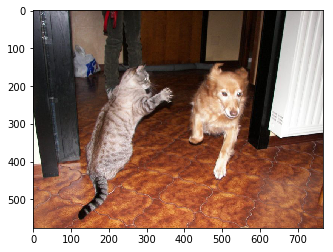

In [7]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('temel/a.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

#saving image
cv2.imwrite('temel/test_write.jpg',image)

# **Gri Tona Dönüştürme / BGR-HSV Dönüşüm**

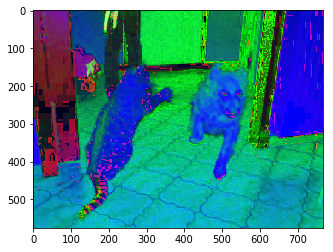

In [8]:
#import the required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
image = cv2.imread('temel/a.jpg') 
#converting image to Gray scale 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

# Resimi Yeniden Boyutlandırma

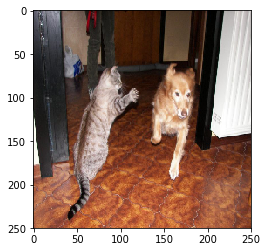

In [6]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image 
image = cv2.imread('temel/a.jpg') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#converting image to size (100,100,3) 
smaller_image = cv2.resize(image,(250,250), interpolation = cv2.INTER_NEAREST) 
#plot the resized image
plt.imshow(smaller_image);

# **Resmi Döndürme**

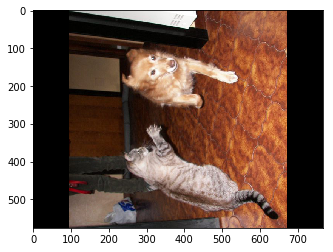

In [20]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('temel/a.jpg') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

# **Resmi x,y eksenlerinde kaydırma**

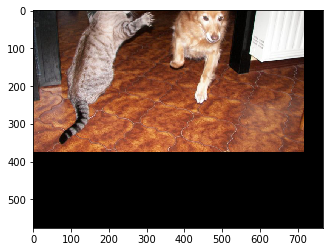

In [34]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
#reading the image
image = cv2.imread('temel/a.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,-50],[0,1,-200]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

# **Thresholding**

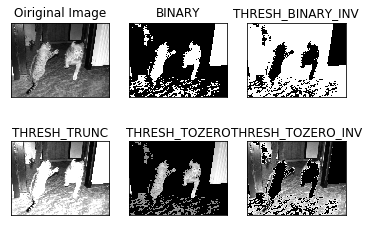

In [25]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('temel/a.jpg',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Original Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# **Adaptive Thresholding**

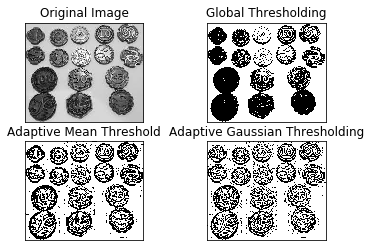

In [37]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread('temel/coin.jpg',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# **Image Segmentation (Watershed Algorithm)**

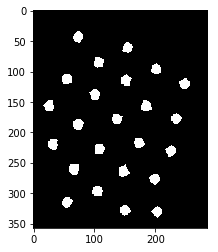

In [4]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#reading the image
image = cv2.imread('temel/coin.PNG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 1)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 1)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg,cmap='gray')

# **Bitwise Operations**

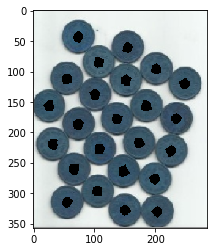

In [42]:
#import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 
#read the image
image = cv2.imread('temel/coin.PNG')
#apply thresholdin 
ret,mask = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
plt.imshow(final)

# **Kenar Tespiti**

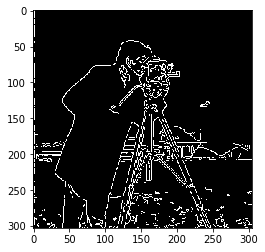

In [43]:
#import the required libraries
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('temel/man.PNG') 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges,cmap='gray')

## **Görüntü Filtreleme**

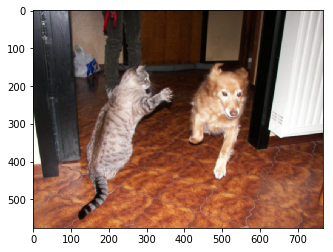

In [46]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('temel/a.jpg') 
#using the averaging kernel for image smoothening 
averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 
plt.imshow(dst) 
#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel)
filtered_image=cv2.cvtColor(filtered_image,cv2.COLOR_BGR2RGB)
plt.imshow(filtered_image)

# **Image Contours**

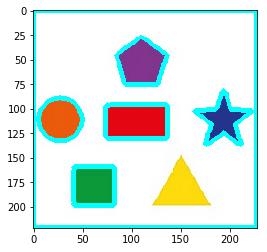

In [7]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('temel/contour.png') 
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,255),3) 
plt.imshow(with_contours)

# **Scale Invariant Feature Transform (SIFT)**

3.4.1


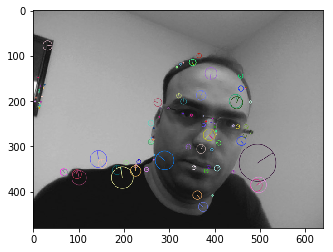

In [51]:
#import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#show OpenCV version
print(cv2.__version__)
#read the iamge and convert to grayscale
image = cv2.imread('temel/ben.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray,
                                   keypoints,
                                   outImage=np.array([]), 
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#plot the image
plt.imshow(with_keypoints)

# **Speeded-Up Robust Features (SURF)**

3.4.1


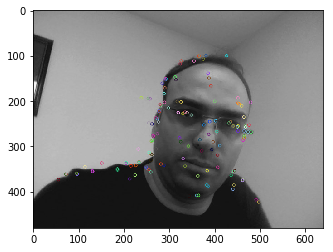

In [53]:
#import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#show OpenCV version
print(cv2.__version__)
#read image and convert to grayscale
image = cv2.imread('temel/ben.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#instantiate surf object
surf  = cv2.xfeatures2d.SURF_create(400)
#calculate keypoints and their orientation
keypoints,descriptors = surf.detectAndCompute(gray,None)

with_keypoints = cv2.drawKeypoints(gray,keypoints,
                                  outImage=np.array([]))

plt.imshow(with_keypoints)

# **Feature Matching**

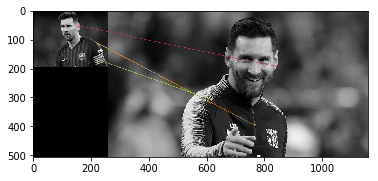

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#reading images in grayscale format
image1 = cv2.imread('temel/messi.jpg',0)
image2 = cv2.imread('temel/messi2.jpg',0)

sift = cv2.xfeatures2d.SIFT_create()

#finding out the keypoints and their descriptors
keypoints1,descriptors1 = sift.detectAndCompute(image1,None)
keypoints2,descriptors2 = sift.detectAndCompute(image2,None)

#matching the descriptors from both the images 
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1,descriptors2,k = 2)


#selecting only the good features
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

image3 = cv2.drawMatchesKnn(image1,keypoints1,image2,keypoints2,good_matches,None,flags = 2)
plt.imshow(image3,cmap='gray') 